In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.style.use('fivethirtyeight')
mpl.rcParams['lines.linewidth'] = 2

In [2]:
# https://www.kaggle.com/tomigelo/spotify-audio-features
df1 = pd.read_csv('SpotifyFeatures.csv')
df1.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
# https://www.tableau.com/about/blog/2019/7/how-visualize-spotify-music-trends-tableau
df2 = pd.read_csv('Spotify_Daily_Streaming.csv')

In [4]:
df2['Country'] = df2['Country'].apply(lambda text: re.sub(r'Viet Name', 'Vietnam', str(text)))
df2['Track ID'] = df2['Track URL'].apply(lambda text: re.search(r"([^\/]+$)", str(text)).group())
df2['Date'] = pd.to_datetime(df2['Date'])

In [5]:
df2.head()

,Date,Track URL,Position,Track Name,Artist,Streams,Country,Track ID
0,2017-07-20,https://open.spotify.com/track/3RXkboS74UYzN14...,1,NaN,NaN,3457,Lithuania,3RXkboS74UYzN14xTqzPyY
1,2018-07-31,https://open.spotify.com/track/77wz2VtAwxAwYOG...,1,"Miljonair (feat. SBMG, Lil' Kleine, Boef & Ron...",$hirak,238729,Netherlands,77wz2VtAwxAwYOGTJrZBKT
2,2018-08-02,https://open.spotify.com/track/77wz2VtAwxAwYOG...,1,"Miljonair (feat. SBMG, Lil' Kleine, Boef & Ron...",$hirak,245639,Netherlands,77wz2VtAwxAwYOGTJrZBKT
3,2017-07-23,https://open.spotify.com/track/6mw02h3qbWmuq2b...,1,Millionär,187 Strassenbande,387632,Germany,6mw02h3qbWmuq2bJCRjRAe
4,2018-06-29,https://open.spotify.com/track/2iUXsYOEPhVqEBw...,1,Youngblood,5 Seconds of Summer,261795,Australia,2iUXsYOEPhVqEBwsqP70rE


In [6]:
df2.groupby(['Date', 'Country'])['Position'].count()

Date        Country       
2017-01-01  Argentina         200
            Australia         200
            Austria           200
            Bolivia            66
            Brazil            200
                             ... 
2019-07-01  Turkey            200
            United Kingdom    200
            United States     200
            Uruguay           200
            Vietnam           200
Name: Position, Length: 47428, dtype: int64

In [7]:
poor_data = df2.groupby(['Date', 'Country'])['Position'].count().groupby('Country').mean()
poor_data

Country
Argentina         200.000000
Australia         200.000000
Austria           200.000000
Belgium           200.000000
Bolivia           144.259626
                     ...    
Turkey            200.000000
United Kingdom    200.000000
United States     200.000000
Uruguay           199.592593
Vietnam           142.574737
Name: Position, Length: 63, dtype: float64

In [8]:
for idx, row in poor_data.items():
    if row < 200:
        print('{:1f}'.format(row), idx)

144.259626 Bolivia
32.029703 Bulgaria
198.779978 Czech Republic
182.400440 Dominican Republic
138.091309 El Salvador
56.512706 Estonia
115.366337 Greece
193.822882 Guatemala
163.111111 Honduras
184.358636 Hungary
116.412541 Iceland
178.972632 Israel
198.238724 Japan
65.897025 Latvia
61.856948 Lithuania
19.950450 Luxembourg
35.205021 Malta
27.215768 Nicaragua
166.364136 Panama
176.853685 Paraguay
149.764211 Romania
101.628729 Slovakia
135.273418 South Africa
199.998900 Sweden
195.177083 Thailand
199.592593 Uruguay
142.574737 Vietnam


In [9]:
countries_to_drop = []
# poor_data = df2.groupby(['Date', 'Country'])['Position'].count().groupby('Country').mean().items()

for idx, row in df2.groupby(['Date', 'Country'])['Position'].count().groupby('Country').mean().items():
    if row < 150:
        countries_to_drop.append(idx)
countries_to_drop

['Bolivia',
 'Bulgaria',
 'El Salvador',
 'Estonia',
 'Greece',
 'Iceland',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Nicaragua',
 'Romania',
 'Slovakia',
 'South Africa',
 'Vietnam']

In [10]:
df = pd.merge(left=df2, right=df1, left_on='Track ID', right_on='track_id')
df.head()

,Date,Track URL,Position,Track Name,Artist,Streams,Country,Track ID,genre,artist_name,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,2018-06-29,https://open.spotify.com/track/2iUXsYOEPhVqEBw...,1,Youngblood,5 Seconds of Summer,261795,Australia,2iUXsYOEPhVqEBwsqP70rE,Dance,5 Seconds of Summer,...,0.854,0.0,G,0.124,-5.114,Minor,0.463,120.274,4/4,0.152
1,2018-06-29,https://open.spotify.com/track/2iUXsYOEPhVqEBw...,1,Youngblood,5 Seconds of Summer,261795,Australia,2iUXsYOEPhVqEBwsqP70rE,Pop,5 Seconds of Summer,...,0.854,0.0,G,0.124,-5.114,Minor,0.463,120.274,4/4,0.152
2,2018-06-16,https://open.spotify.com/track/2iUXsYOEPhVqEBw...,1,Youngblood,5 Seconds of Summer,56610,New Zealand,2iUXsYOEPhVqEBwsqP70rE,Dance,5 Seconds of Summer,...,0.854,0.0,G,0.124,-5.114,Minor,0.463,120.274,4/4,0.152
3,2018-06-16,https://open.spotify.com/track/2iUXsYOEPhVqEBw...,1,Youngblood,5 Seconds of Summer,56610,New Zealand,2iUXsYOEPhVqEBwsqP70rE,Pop,5 Seconds of Summer,...,0.854,0.0,G,0.124,-5.114,Minor,0.463,120.274,4/4,0.152
4,2018-12-25,https://open.spotify.com/track/2iUXsYOEPhVqEBw...,155,Youngblood,5 Seconds of Summer,1353,Greece,2iUXsYOEPhVqEBwsqP70rE,Dance,5 Seconds of Summer,...,0.854,0.0,G,0.124,-5.114,Minor,0.463,120.274,4/4,0.152


In [11]:
df = pd.merge(left=df2,
              right=df1.drop('genre', axis=1).drop_duplicates(),
              left_on='Track ID',
              right_on='track_id').sort_values(['Date',
                                                'Position',
                                                'Country'])

In [12]:
df

,Date,Track URL,Position,Track Name,Artist,Streams,Country,Track ID,artist_name,track_name,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
1740916,2017-01-01,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,1,Chantaje (feat. Maluma),Shakira,253019,Argentina,6mICuAdrwEjh6Y6lroV2Kg,Shakira,Chantaje (feat. Maluma),...,0.773,0.000030,G#,0.1590,-2.921,Minor,0.0776,102.034,4/4,0.907
74415,2017-01-01,https://open.spotify.com/track/3AEZUABDXNtecAO...,1,Reggaetón Lento (Bailemos),CNCO,6784,Bolivia,3AEZUABDXNtecAOSC1qTfo,CNCO,Reggaetón Lento (Bailemos),...,0.838,0.000000,E,0.1760,-3.073,Minor,0.0502,93.974,4/4,0.710
1740939,2017-01-01,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,1,Chantaje (feat. Maluma),Shakira,136652,Chile,6mICuAdrwEjh6Y6lroV2Kg,Shakira,Chantaje (feat. Maluma),...,0.773,0.000030,G#,0.1590,-2.921,Minor,0.0776,102.034,4/4,0.907
2738239,2017-01-01,https://open.spotify.com/track/3QwBODjSEzelZyV...,1,Otra vez (feat. J Balvin),Zion & Lennox,38341,Colombia,3QwBODjSEzelZyVjxPOHdq,Zion & Lennox,Otra Vez (feat. J Balvin),...,0.772,0.000486,A#,0.4400,-5.429,Major,0.1000,96.016,4/4,0.704
77537,2017-01-01,https://open.spotify.com/track/3AEZUABDXNtecAO...,1,Reggaetón Lento (Bailemos),CNCO,20171,Costa Rica,3AEZUABDXNtecAOSC1qTfo,CNCO,Reggaetón Lento (Bailemos),...,0.838,0.000000,E,0.1760,-3.073,Minor,0.0502,93.974,4/4,0.710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575078,2019-07-01,https://open.spotify.com/track/2qfEcCkEo5NscA9...,200,Nobody,Martin Jensen,1092,South Africa,2qfEcCkEo5NscA9GL7ER72,Martin Jensen,Nobody,...,0.687,0.000000,F#,0.1810,-5.295,Minor,0.0623,96.964,4/4,0.524
3575079,2019-07-01,https://open.spotify.com/track/2qfEcCkEo5NscA9...,200,Nobody,Martin Jensen,1092,South Africa,2qfEcCkEo5NscA9GL7ER72,Martin Jensen,Nobody,...,0.687,0.000000,F#,0.1810,-5.295,Minor,0.0623,96.964,4/4,0.524
2792612,2019-07-01,https://open.spotify.com/track/1G586ld1gbaECg4...,200,No Me Acuerdo,Thalía,30006,Spain,1G586ld1gbaECg4Bc6w40O,Thalía,No Me Acuerdo,...,0.784,0.000000,G,0.0897,-4.531,Minor,0.1010,94.036,4/4,0.748
2792613,2019-07-01,https://open.spotify.com/track/1G586ld1gbaECg4...,200,No Me Acuerdo,Thalía,30006,Spain,1G586ld1gbaECg4Bc6w40O,Thalía,No Me Acuerdo,...,0.784,0.000000,G,0.0897,-4.531,Minor,0.1010,94.036,4/4,0.748


In [13]:
for idx, row in df.groupby(['Date', 'Country'])['Position'].count().groupby('Country').mean().items():
    if row < 150:
        print('{:.1f}'.format(row), idx)

106.2 Argentina
119.6 Australia
73.4 Austria
68.9 Belgium
92.9 Bolivia
31.6 Brazil
15.1 Bulgaria
132.4 Canada
126.3 Chile
115.4 Colombia
118.2 Costa Rica
103.6 Czech Republic
67.6 Denmark
113.7 Dominican Republic
115.4 Ecuador
90.1 El Salvador
30.8 Estonia
30.1 Finland
40.8 France
64.2 Germany
123.9 Global
67.1 Greece
116.0 Guatemala
75.1 Honduras
69.0 Hong Kong
101.4 Hungary
45.9 Iceland
66.0 India
81.4 Indonesia
108.9 Ireland
85.2 Israel
49.7 Italy
71.0 Japan
37.6 Latvia
35.1 Lithuania
8.8 Luxembourg
98.6 Malaysia
17.7 Malta
121.4 Mexico
63.7 Netherlands
123.0 New Zealand
15.6 Nicaragua
87.4 Norway
100.7 Panama
106.6 Paraguay
129.4 Peru
115.7 Philippines
73.1 Poland
93.9 Portugal
102.0 Romania
98.5 Singapore
54.9 Slovakia
96.1 South Africa
98.3 Spain
77.4 Sweden
90.0 Switzerland
71.2 Taiwan
72.4 Thailand
34.7 Turkey
105.6 United Kingdom
141.2 United States
60.7 Uruguay
69.8 Vietnam


In [14]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(df.groupby(['Date', 'Country'])['Position'].count())
df.groupby(['Date', 'Country'])['Position'].count()

Date        Country       
2017-01-01  Argentina         69
            Australia         95
            Austria           71
            Bolivia           32
            Brazil            38
                              ..
2019-07-01  Turkey            11
            United Kingdom    55
            United States     82
            Uruguay           53
            Vietnam           70
Name: Position, Length: 47426, dtype: int64

In [15]:
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['dayofweek'] = df['Date'].dt.dayofweek

In [16]:
countries_to_drop = []

for idx, row in df.groupby(['Date', 'Country'])['Position'].count().groupby('Country').min().items():
    if row < 30:
        countries_to_drop.append(idx)
countries_to_drop

['Austria',
 'Bolivia',
 'Brazil',
 'Bulgaria',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Nicaragua',
 'Slovakia',
 'South Africa',
 'Sweden',
 'Turkey',
 'Vietnam']

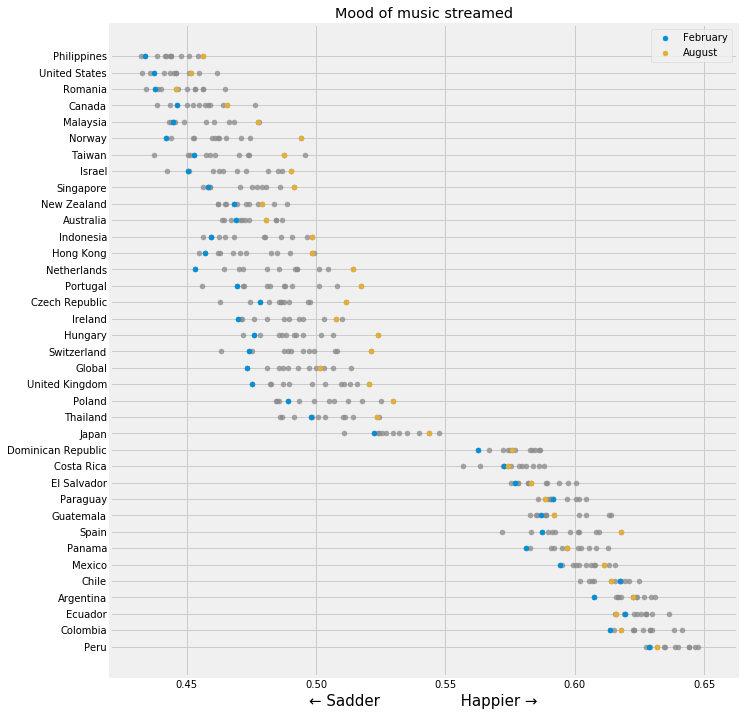

In [17]:
countries = [(df[df['Country'] == country].groupby(['Country'])['valence'].mean().tolist(), country) for country in df['Country'].unique()]
countries.sort(key=lambda x: x[0], reverse=True)

plt.figure(figsize=(10, 12))
for country in countries:
    country = country[1]
    if country not in countries_to_drop:
        data = df[df['Country'] == country].groupby(['month', 'Country'])['valence'].mean().tolist()
        if country == 'Global':
            plt.scatter(data, [country] * len(data), c='#8b8b8b', s=25, alpha=.75)
            plt.scatter(data[1], country, c='#008fd5', s=25, label='February')
            plt.scatter(data[7], country, c='#e5ae38', s=25, label='August')
        else:
            if len(data) == 12:
                plt.scatter(data, [country] * len(data), c='#8b8b8b', s=25, alpha=.75)
                plt.scatter(data[1], country, c='#008fd5', s=25)
                plt.scatter(data[6], country, c='#e5ae38', s=25)
plt.title('Mood of music streamed')
plt.xlabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15)
plt.legend()
plt.show()

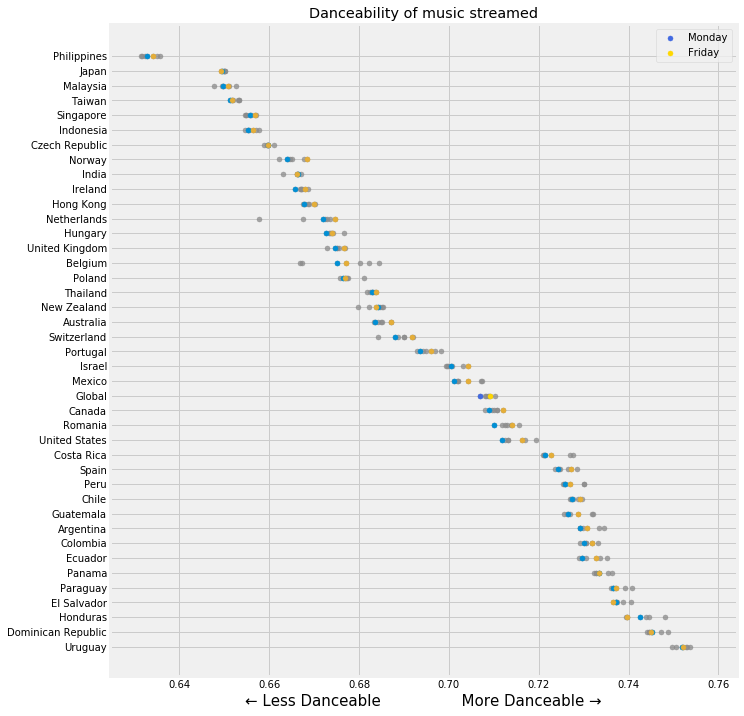

In [18]:
countries = [(df[df['Country'] == country].groupby(['Country'])['danceability'].mean().tolist(), country) for country in df['Country'].unique()]
countries.sort(key=lambda x: x[0], reverse=True)

plt.figure(figsize=(10, 12))
for country in countries:
    country = country[1]
    if country not in countries_to_drop:
        data = df[df['Country'] == country].groupby(['dayofweek', 'Country'])['danceability'].mean().tolist()
        if country == 'Global':
            plt.scatter(data, [country] * len(data), c='#8b8b8b', s=25, alpha=.75)
            plt.scatter(data[0], country, c='royalblue', s=25, label='Monday')
            plt.scatter(data[4], country, c='gold', s=25, label='Friday')
        else:
            if len(data) == 7:
                plt.scatter(data, [country] * len(data), c='#8b8b8b', s=25, alpha=.75)
                plt.scatter(data[0], country, c='#008fd5', s=25)
                plt.scatter(data[4], country, c='#e5ae38', s=25)
plt.title('Danceability of music streamed')
plt.xlabel(u'\u2190 Less Danceable                 More Danceable \u2192', fontsize=15)
plt.legend()
plt.show()

In [19]:
df.columns

Index(['Date', 'Track URL', 'Position', 'Track Name', 'Artist', 'Streams',
       'Country', 'Track ID', 'artist_name', 'track_name', 'track_id',
       'popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'month', 'day',
       'dayofweek'],
      dtype='object')

In [20]:
df_year = df[df['Country'] == 'Global'].groupby(['month', 'day'], as_index=False)['valence'].mean()
df_year

,month,day,valence
0,1,1,0.523106
1,1,2,0.481258
2,1,3,0.478503
3,1,4,0.484236
4,1,5,0.485418
...,...,...,...
360,12,27,0.482473
361,12,28,0.483666
362,12,29,0.485893
363,12,30,0.486468


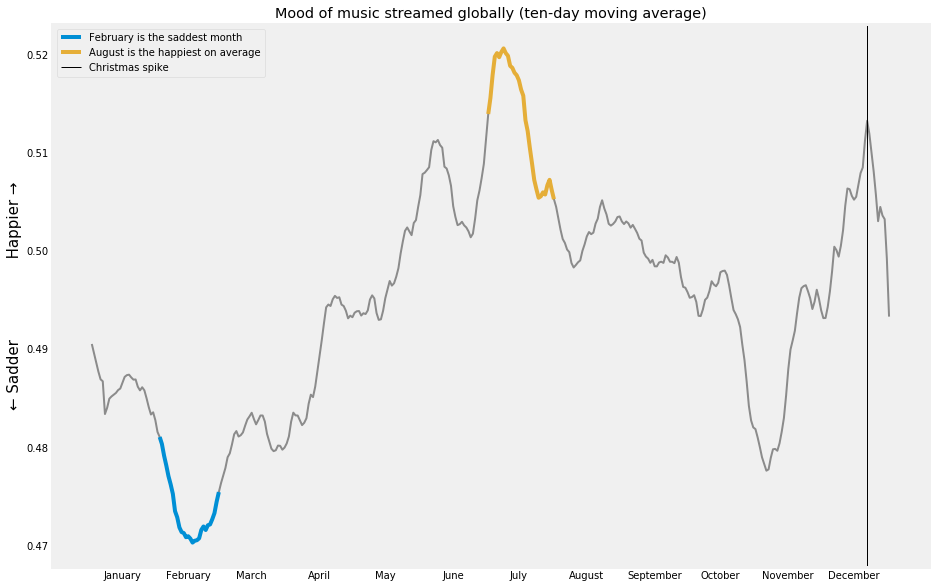

In [21]:
data = df_year['valence'].rolling(window=10, min_periods=1, center=True).mean()

plt.figure(figsize=(14, 10))
plt.plot(data, c='#8b8b8b')
plt.plot(data[df_year[df_year['month'] == 2].index], c='#008fd5', lw=4, label='February is the saddest month')
plt.plot(data[df_year[df_year['month'] == 7].index], c='#e5ae38', lw=4, label='August is the happiest on average')
plt.axvline(x=354, c='k', lw=1, label='Christmas spike')
plt.legend()
plt.xticks(ticks=[14, 44, 73, 104, 134, 165, 195, 226, 257, 287, 318, 348],
           labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.grid(False)
plt.title('Mood of music streamed globally (ten-day moving average)')
plt.ylabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15, rotation=90)
plt.show()

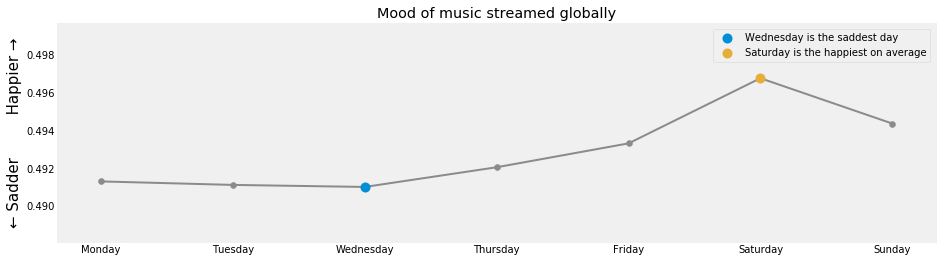

In [22]:
data = df[df['Country'] == 'Global'].groupby(['dayofweek'])['valence'].mean()

plt.figure(figsize=(14, 4))
plt.plot(data, c='#8b8b8b')
plt.scatter(data.index, data, c='#8b8b8b')
plt.scatter(2, data[2], c='#008fd5', lw=4, label='Wednesday is the saddest day', zorder=3)
plt.scatter(5, data[5], c='#e5ae38', lw=4, label='Saturday is the happiest on average', zorder=3)
plt.legend()
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],
           labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylim(data.min() - .5 * (data.max() - data.min()), data.max() + .5 * (data.max() - data.min()))
plt.grid(False)
plt.title('Mood of music streamed globally')
plt.ylabel(u'\u2190 Sadder         Happier \u2192', fontsize=15, rotation=90)
plt.show()

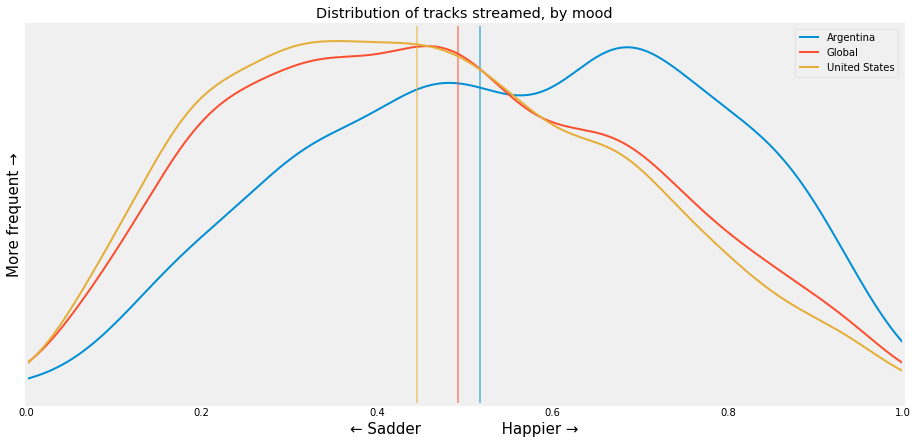

In [23]:
plt.figure(figsize=(14, 7))

df[df['Country'] == 'Argentina'].groupby(['track_id'])['valence'].mean().plot.kde(label='Argentina')
plt.axvline(x=df[df['Country'] == 'Brazil']['valence'].mean(), c='#008fd5', alpha=.5)

df[df['Country'] == 'Global'].groupby(['track_id'])['valence'].mean().plot.kde(label='Global')
plt.axvline(x=df[df['Country'] == 'Global']['valence'].mean(), c='#fc4f30', alpha=.5)

df[df['Country'] == 'United States'].groupby(['track_id'])['valence'].mean().plot.kde(label='United States')
plt.axvline(x=df[df['Country'] == 'United States']['valence'].mean(), c='#e5ae38', alpha=.5)

plt.legend()
plt.xlabel(u'\u2190 Sadder                 Happier \u2192', fontsize=15)
plt.ylabel('More frequent \u2192', fontsize=15, rotation=90)
plt.xlim(0, 1)
plt.yticks([])
plt.grid(False)
plt.title('Distribution of tracks streamed, by mood')
plt.show()